See [Create Your Own Active Matter Simulation (With Python)](https://medium.com/swlh/create-your-own-active-matter-kjsimulation-with-python-76fce4a53b6f) by Philip Mocz.

In [54]:
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [121]:
class Swarm:
    
    def __init__(self, N, L):
        self._L = L
        
        self._x = np.random.uniform(low=0.0, high=L, size=(N, ))
        self._y = np.random.uniform(low=0.0, high=L, size=(N, ))
        self._theta = np.random.uniform(low=0.0, high=2*np.pi, size=(N,))
    
    @property
    def L(self):
        return self._L
    
    @property
    def N(self):
        return len(self._x)

    @property
    def x(self):
        return self._x.copy()
    
    @property
    def y(self):
        return self._y.copy()
    
    @property
    def theta(self):
        return self._theta.copy()
    
    def create_ghost_particles(self):
        x_coords = (self._x - self._L, self._x, self._x + self._L)
        y_coords = (self._y - self._L, self._y, self._y + self._L)
        x_domain, y_domain = [], []
        for x, y in itertools.product(x_coords, y_coords):
            x_domain.append(x)
            y_domain.append(y)
        x_ghost = np.concatenate(x_domain)
        y_ghost = np.concatenate(y_domain)
        return x_ghost, y_ghost

    def move(self, v0, R, eta):
        x_ghost, y_ghost = self.create_ghost_particles()
        new_theta = np.zeros(self.N)
        for i in range(self.N):
            nr_neighbours = 0
            for j, ghost in enumerate(zip(x_ghost, y_ghost)):
                if (self._x[i] - ghost[0])**2 + (self._y[i] - ghost[1])**2 < R**2:
                    new_theta[i] += self._theta[j % self.N]
                    nr_neighbours += 1
            new_theta[i] /= nr_neighbours
            self._x[i] += v0*np.cos(self._theta[i])
            self._y[i] += v0*np.sin(self._theta[i])
        self._theta = new_theta + np.random.uniform(-0.5*eta, 0.5*eta, size=(self.N,))
        self._x = (self._x + self._L) % self._L
        self._y = (self._y + self._L) % self._L

In [126]:
def plot_swarm(swarm, step=0):
    plt.quiver(swarm.x, swarm.y, np.cos(swarm.theta), np.sin(swarm.theta))

In [111]:
def print_swarm(swarm, step=0):
    print(f'step {step}:')
    print(f'    {swarm.x}')
    print(f'    {swarm.y}')
    print(f'    {swarm.theta}')

In [122]:
swarm = Swarm(3, 1.0)

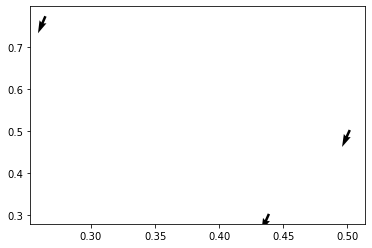

In [127]:
plot_swarm(swarm)

In [102]:
class Simulator:
    
    def __init__(self, v0, R, eta, max_step, action):
        self._v0 = v0
        self._R = R
        self._eta = eta
        self._max_step = max_step
        self._action = action
        
    def simulate(self, swarm):
        self._action(swarm, 0)
        for step in range(1, self._max_step + 1):
            swarm.move(self._v0, self._R, self._eta)
            self._action(swarm, step)

In [129]:
simulator = Simulator(v0=0.5, R=0.5, eta =0.1, max_step=10, action=plot_swarm)

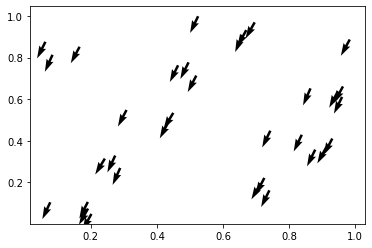

In [130]:
simulator.simulate(swarm)